In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import Math, display
from scipy import constants as const
from scipy import sparse
from scipy.fft import fftn, ifftn, fftfreq
from scipy.optimize import root_scalar
import pickle

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from trap_numerics import functional_hamiltonian
from boson_helpers import *

In [2]:
trap, ham, res = import_results(9)

globals().update(res)

In [3]:
omega_z1 = sp.sqrt(4*trap.power_tweezer1*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer1**3
omega_z2 = sp.sqrt(4*trap.power_tweezer2*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer2**3

omega_r1 = sp.sqrt(2*trap.power_tweezer1*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer1**2
omega_r2 = sp.sqrt(2*trap.power_tweezer2*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer2**2

print(f"omega_r1: {float(trap.subs(omega_r1)):.1f}Hz, omega_r2: {float(trap.subs(omega_r2)):.1f}Hz")
print(f"omega_z1: {float(trap.subs(omega_z1)):.1f}Hz, omega_z2: {float(trap.subs(omega_z2)):.1f}Hz")

aspect_ratio1 = omega_r1 / omega_z1
_aspect_ratio1_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio1_latex} \\approx {trap.subs(aspect_ratio1).evalf():.2f}"))

aspect_ratio2 = omega_r2 / omega_z2
_aspect_ratio2_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio2_latex} \\approx {trap.subs(aspect_ratio2).evalf():.2f}"))

omega_r1: 7331.9Hz, omega_r2: 7331.9Hz
omega_z1: 418.1Hz, omega_z2: 418.1Hz


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
GS_left, GS_right = get_localised_GS(states[0],states[1])

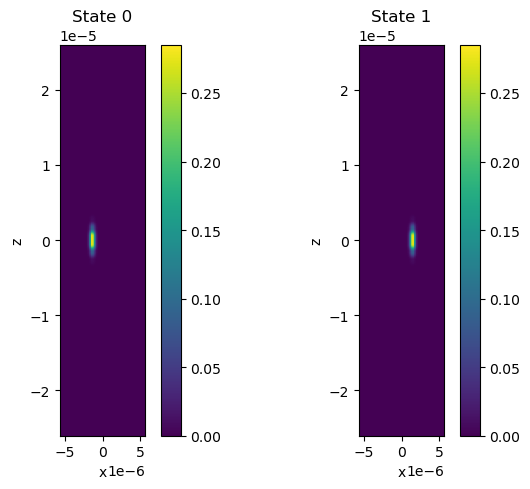

In [5]:
n_states = 2

states_plot = [GS_left.real, GS_right.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, int(len(y)/2), :].T,
                   extent=[*extend[0], *extend[2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


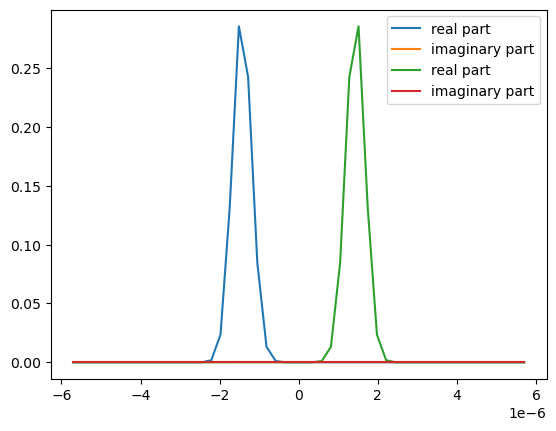

In [6]:
state_number = 0
phase_mult0 = 1

plt.plot(x,(phase_mult0*GS_left[:,int(len(y)/2),int(len(z)/2)]).real, label="real part")
plt.plot(x,(phase_mult0*GS_left[:,int(len(y)/2),int(len(z)/2)]).imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()

state_number = 1
phase_mult1 = 1

plt.plot(x,(phase_mult1*GS_right[:,int(len(y)/2),int(len(z)/2)]).real, label="real part")
plt.plot(x,(phase_mult1*GS_right[:,int(len(y)/2),int(len(z)/2)]).imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

# Calculate J, U_s, U_dd, U:

In [7]:
print(f"J = {get_J(GS_left, GS_right, ham, dvol)/const.h}")

J = 0.0009612848724873431


In [8]:
#scattering length
a_s = 85* const.physical_constants["Bohr radius"][0]
#mass
mass = float(trap.subs(trap.m))

print(f"U_s = {get_U_s(trap, GS_left, dvol)/const.h}")

U_s = 3.849482910362117


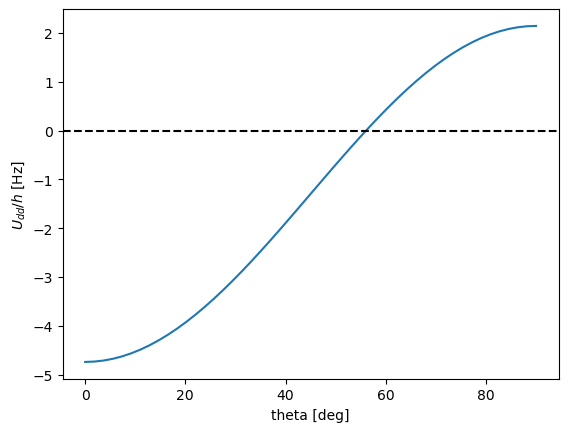

In [9]:
#magnetic moment
mu = float(trap.subs(trap.mu_b))

#polarisation
angles= np.deg2rad(np.linspace(0,90))
U_dds = np.zeros_like(angles)
polarisations = np.zeros((len(angles),3))
polarisations[:,0] = np.sin(angles)
polarisations[:,2] = np.cos(angles)

for i, pol in enumerate(polarisations):
    trap[trap.B_x] = pol[0]
    trap[trap.B_y] = pol[1]
    trap[trap.B_z] = pol[2]

    U_dds[i] = get_U_dd(trap, GS_left, dvol)


plt.plot(np.rad2deg(angles), U_dds/const.h)

plt.axhline(0,color="black",ls="--")

plt.xlabel("theta [deg]")
plt.ylabel(r"$U_{dd} / h$ [Hz]")
plt.show()